## Executive Summary - EDA on the impact of Covid-19 on New York City Taxi Services


#### The period of this study is set to be the intial period of the onset of infestion in the NYC area which is Monday 9th March to Sunday 7th June, where there was intial spike of infections. 

The important dates from Covid-19 infection related public announcment and proceedings into consideration are : 
1. 9th February - Initial Spike in Infection, 
2. 12th March - Restriction on Mass Gathering, 
3. 22nd Mar - Shelter in place orders, 
4. 8th June - Restrictions relaxed

### The Questions to be explored:
#### 1. What has been the impact of the pandemic on NYC taxi revenue over time?

During the onset of Covid-19 infection there has been a steep decline in revenue generation for the legacy of NYC the yellow-cab. At around the time when the public restrictions were imposed, 12th March 2020 - 22nd Mar 2020, the average renenue of yellow cab dropped from around 18-19 USD to below 15 USD.

Such gap in revenue sustained over an extensive period of time even beyond initial relaxation of restrictions on June 8th 2020.

For the "drop-off" favourites green-cab, the story is differnt though, from an average of mere 15 USD before the onset of pandemic to an up-scaled average of around 17 USD. During similar timeframe in the previous year the green-cab generated an average of around 15 USD - 16 USD.

Reference Fig 1 and Fig 2.

#### 2. What was the most expensive trip? Between what zones? Conversely what was the cheapest trip? What is the difference between these before and during the peak impact of the pandemic?

During week 10, where first onset of infection occoured in NYC, the most expensive and least expensive trip by 
Yellow-cab was between: 

Most Expensive Trip - 22_Brooklyn_Bensonhurst West_Boro Zone, 193_Queens_Queensbridge/Ravenswood_Boro Zone.
Least Expensive Trip - 141_Manhattan_Lenox Hill West_Yellow Zone, 140_Manhattan_Lenox Hill East_Yellow Zone. 

At week 11, when shelter in place was set,

Most Expensive - 10_Queens_Baisley Park_Boro Zone, 10_Queens_Baisley Park_Boro Zone.
Least Expensive - 238_Manhattan_Upper West Side North_Yellow Zone, 238_Manhattan_Upper West Side North_Yellow Zone.

At around week 10, during the same time last year(2019),

Most Expensive - 226_Queens_Sunnyside_Boro Zone, 226_Queens_Sunnyside_Boro Zone.
Least Expensive - 132_Queens_JFK Airport_Airports, 132_Queens_JFK Airport_Airports.

At week 11,

Most Expensive - 193_Queens_Queensbridge/Ravenswood_Boro Zone, 193_Queens_Queensbridge/Ravenswood_Boro Zone.
Least Expensive - 10_Queens_Baisley Park_Boro Zone, 230_Manhattan_Times Sq/Theatre District_Yellow.

During the peak impact of the initial pandemic there most expensive trips and even the least expensive trips are made within Manhattan, Queens and Brooklyn borough zones. Where as before the pandemic during similar time frame previous year, most expensive trips are generally with the same borough zones of Manhattan or Queens or Boorklyn.
 
Similarly with green-cab we can observe that

In 2020 during the week 10

Most Expensive - 61_Brooklyn_Crown Heights North_Boro Zone, 17_Brooklyn_Bedford_Boro Zone
Least Expensive - 116_Manhattan_Hamilton Heights_Boro Zone, 116_Manhattan_Hamilton Heights_Boro Zone

During week 11,

Most Expensive - 223_Queens_Steinway_Boro Zone, 223_Queens_Steinway_Boro Zone
Least Expensive - 130_Queens_Jamaica_Boro Zone, 130_Queens_Jamaica_Boro Zone

Where as during the similar timeframe in 2019 we observed that,

During week 10,

Most Expensive - 42_Manhattan_Central Harlem North_Boro Zone, 42_Manhattan_Central Harlem North_Boro Zone
Least Expensive - 198_Queens_Ridgewood_Boro Zone, 198_Queens_Ridgewood_Boro Zone

During week 11,

Most Expensive - 193_Queens_Queensbridge/Ravenswood_Boro Zone, 193_Queens_Queensbridge/Ravenswood_Boro Zone
Least Expensive - 51_Bronx_Co-Op City_Boro Zone, 264_Unknown_NV_nan

Hence we can observe that during the peak impact of the onset of the pandemic at week 10,11 the "drop-off" favourite green cab, has most expensive trip with the same Borough zones of Manhattan and Queens.

#### 3. Whats the most popular payment method? Did this change because of the pandemic?

The payment behaviour during the onset of the initial peak of the pandemic has been the most surprising feature of this EDA. 

The most popular paymnet method has been $credit-card$ for NYC taxi services. Before the onset of Covid-19 the daily number of transactions for yellow-cab reached well over $200k$ per day but during the $intial peak$ of the pandemic when the restrictions were put in place, peoples behaviour changed dractically. The daily number of transactions for credit card fell almost to the $same level$ as cash transactions with very minimal edge over the former. This prefernce of transactional behaviour rmained sustained even after the restrictions were eased. 

In case of Green-Cab services, the insights are even more interesting during the pandemic the daily number of cash transactions $exceeded$ the daily credit card transaction by a narrow but sustainable margin. However, this behaviour seemed like starting to reverse where credit card transactions were taking presedence over the cash in the later half of the pandemic year, specially after the restrictions were eased.

Reference Fig 5 and Fig 6.

#### 4. Whats the most expensive day of the week to travel on? Did this change because of the pandemic?

Due to the nature of the pandemic both yellow-cab and green-cab had expereinced different customer behaviour.

During the peak of the pandemic the most expensive day of the week for yellow-cab has transfomed from being Thrusdays to Sundays during the same timeframe when compared to the previous year 2019.

A different behaviour is observed for "just-drop-offs" green-cab service which has got the most expensive on Wednesdays during covid-19 (2020) pandemic compared to Fridays during previous normal year (2019).

Referene Fig 7a and 7b.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [3]:
cols_to_consider_yellow = ['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'trip_distance',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'total_amount']

In [4]:
cols_to_consider_green = ['lpep_pickup_datetime',
 'lpep_dropoff_datetime',
 'trip_distance',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'total_amount']

In [5]:
years = ['2019', '2020']
months = [x for x in range(2, 8)] #Feb to August
days = [31, 28] + [30 if x % 2 == 0 else 31 for x in months[1:]] + [31]

In [6]:
final_columns = [
    "Date",
    "max_PULocationID",
    "max_DOLocationID",
    "max_revenue",
    "min_PULocationID",
    "min_DOLocationID",
    "min_revenue",
    "payment_type_1_count",
    "average_revenue_1",
    "payment_type_2_count",
    "average_revenue_2",
]


In [7]:
green_taxi_df = pd.DataFrame(columns=final_columns)
for year in years:
    if year == "2020":
        days[1] = 29
    else:
        days[1] = 28

    for month in months:  # Feb to August
        cur_url = f"https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_{year}-0{month}.csv"
        cur_df = pd.read_csv(cur_url, usecols=cols_to_consider_green)

        # convert datetime column to just date
        cur_df["Date"] = pd.to_datetime(cur_df["lpep_pickup_datetime"]).dt.date
        cur_df["lpep_pickup_datetime"] = pd.to_datetime(cur_df["lpep_pickup_datetime"])
        cur_df["lpep_dropoff_datetime"] = pd.to_datetime(
            cur_df["lpep_dropoff_datetime"]
        )

        # Filtering based on the month
        cur_df = cur_df.loc[
            (
                cur_df["lpep_pickup_datetime"].dt.date
                > dt.date(int(year), month - 1, days[month - 2])
            )
            & (
                cur_df["lpep_dropoff_datetime"].dt.date
                < dt.date(int(year), month + 1, 1)
            )
        ]

        # Filtering based on payment method to exclude anomalies
        # Also Ensuring the trip is valid trip with trip distance
        # Also ensuring that the seeming glitchy total fare amount is greater than 0
        cur_df = cur_df.query(
            "payment_type in [1, 2] & trip_distance > 0 & total_amount > 0"
        )

        # Getting time duration per trip
        cur_df["Trip_duration_min"] = (
            cur_df.lpep_dropoff_datetime - cur_df.lpep_pickup_datetime
        ) / pd.Timedelta(minutes=1)
        # Filtering out negative trip duration
        cur_df = cur_df.query("Trip_duration_min > 0")
        cur_avg_tdur_df = (
            cur_df.groupby(["Date"])["Trip_duration_min"].mean().reset_index()
        )

        cur_min_df = cur_df.loc[
            cur_df.groupby("Date")["total_amount"].idxmin(),
            ["Date", "PULocationID", "DOLocationID", "total_amount"],
        ]
        cur_max_df = cur_df.loc[
            cur_df.groupby("Date")["total_amount"].idxmax(),
            ["Date", "PULocationID", "DOLocationID", "total_amount"],
        ]

        cur_min_df.rename(
            columns={
                "PULocationID": "min_PULocationID",
                "DOLocationID": "min_DOLocationID",
                "total_amount": "min_revenue",
            },
            inplace=True,
        )
        cur_max_df.rename(
            columns={
                "PULocationID": "max_PULocationID",
                "DOLocationID": "max_DOLocationID",
                "total_amount": "max_revenue",
            },
            inplace=True,
        )

        cur_min_max_df = cur_min_df.merge(cur_max_df, on="Date")

        cur_pay_rev_df = (
            cur_df.groupby(["Date", "payment_type"])["total_amount"]
            .agg({"size", "mean"})
            .rename(columns={"size": "payment_type_count", "mean": "average_revenue"})
            .reset_index()
        )

        cur_pay_rev_1_df = (
            cur_pay_rev_df.query("payment_type == 1")
            .rename(
                columns={
                    "payment_type_count": "payment_type_1_count",
                    "average_revenue": "average_revenue_1",
                }
            )
            .drop("payment_type", axis=1)
        )
        cur_pay_rev_2_df = (
            cur_pay_rev_df.query("payment_type == 2")
            .rename(
                columns={
                    "payment_type_count": "payment_type_2_count",
                    "average_revenue": "average_revenue_2",
                }
            )
            .drop("payment_type", axis=1)
        )

        cur_pay_rev_df = cur_pay_rev_1_df.merge(cur_pay_rev_2_df, on="Date")

        cur_df = cur_min_max_df.merge(cur_pay_rev_df, on="Date")
        cur_df = cur_df.merge(cur_avg_tdur_df, on="Date")

        green_taxi_df = pd.concat([green_taxi_df, cur_df], axis=0, ignore_index=True)


In [8]:
#green_taxi_df.to_csv("green_taxi.csv", index=False)

In [9]:
yellow_taxi_df = pd.DataFrame(columns=final_columns)
for year in years:
    if year == "2020":
        days[1] = 29
    else:
        days[1] = 28

    for month in months:  # Feb to August
        cur_url = f"https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_{year}-0{month}.csv"
        cur_df = pd.read_csv(cur_url, usecols=cols_to_consider_yellow)

        # convert datetime column to just date
        cur_df["Date"] = pd.to_datetime(cur_df["tpep_pickup_datetime"]).dt.date
        cur_df["tpep_pickup_datetime"] = pd.to_datetime(cur_df["tpep_pickup_datetime"])
        cur_df["tpep_dropoff_datetime"] = pd.to_datetime(
            cur_df["tpep_dropoff_datetime"]
        )

        # Filtering based on the month
        cur_df = cur_df.loc[
            (
                cur_df["tpep_pickup_datetime"].dt.date
                > dt.date(int(year), month - 1, days[month - 2])
            )
            & (
                cur_df["tpep_dropoff_datetime"].dt.date
                < dt.date(int(year), month + 1, 1)
            )
        ]

        # Filtering based on payment method to exclude anomalies
        # Also Ensuring the trip is valid trip with trip distance
        # Also ensuring that the seeming glitchy total fare amount is greater than 0
        cur_df = cur_df.query(
            "payment_type in [1, 2] & trip_distance > 0 & total_amount > 0"
        )

        # Getting time duration per trip
        cur_df["Trip_duration_min"] = (
            cur_df.tpep_dropoff_datetime - cur_df.tpep_pickup_datetime
        ) / pd.Timedelta(minutes=1)
        # Filtering out negative trip duration
        cur_df = cur_df.query("Trip_duration_min > 0")
        cur_avg_tdur_df = (
            cur_df.groupby(["Date"])["Trip_duration_min"].mean().reset_index()
        )

        cur_min_df = cur_df.loc[
            cur_df.groupby("Date")["total_amount"].idxmin(),
            ["Date", "PULocationID", "DOLocationID", "total_amount"],
        ]
        cur_max_df = cur_df.loc[
            cur_df.groupby("Date")["total_amount"].idxmax(),
            ["Date", "PULocationID", "DOLocationID", "total_amount"],
        ]

        cur_min_df.rename(
            columns={
                "PULocationID": "min_PULocationID",
                "DOLocationID": "min_DOLocationID",
                "total_amount": "min_revenue",
            },
            inplace=True,
        )
        cur_max_df.rename(
            columns={
                "PULocationID": "max_PULocationID",
                "DOLocationID": "max_DOLocationID",
                "total_amount": "max_revenue",
            },
            inplace=True,
        )

        cur_min_max_df = cur_min_df.merge(cur_max_df, on="Date")

        cur_pay_rev_df = (
            cur_df.groupby(["Date", "payment_type"])["total_amount"]
            .agg({"size", "mean"})
            .rename(columns={"size": "payment_type_count", "mean": "average_revenue"})
            .reset_index()
        )

        cur_pay_rev_1_df = (
            cur_pay_rev_df.query("payment_type == 1")
            .rename(
                columns={
                    "payment_type_count": "payment_type_1_count",
                    "average_revenue": "average_revenue_1",
                }
            )
            .drop("payment_type", axis=1)
        )
        cur_pay_rev_2_df = (
            cur_pay_rev_df.query("payment_type == 2")
            .rename(
                columns={
                    "payment_type_count": "payment_type_2_count",
                    "average_revenue": "average_revenue_2",
                }
            )
            .drop("payment_type", axis=1)
        )

        cur_pay_rev_df = cur_pay_rev_1_df.merge(cur_pay_rev_2_df, on="Date")

        cur_df = cur_min_max_df.merge(cur_pay_rev_df, on="Date")
        cur_df = cur_df.merge(cur_avg_tdur_df, on="Date")

        yellow_taxi_df = pd.concat([yellow_taxi_df, cur_df], axis=0, ignore_index=True)


In [10]:
#yellow_taxi_df.to_csv("yellow_taxi.csv", index=False)

### Data Transformations and Visualization to analyze Revenue Generation

In [11]:
# green_taxi_df = pd.read_csv('green_taxi.csv').drop_duplicates()
# yellow_taxi_df = pd.read_csv('yellow_taxi.csv').drop_duplicates()

In [12]:
green_taxi_df['Date'] = pd.to_datetime(green_taxi_df['Date'])
yellow_taxi_df['Date'] = pd.to_datetime(yellow_taxi_df['Date'])

In [13]:
green_taxi_2019_df = green_taxi_df[green_taxi_df['Date'].dt.year == 2019]
green_taxi_2020_df = green_taxi_df[green_taxi_df['Date'].dt.year == 2020]

yellow_taxi_2019_df = yellow_taxi_df[yellow_taxi_df['Date'].dt.year == 2019]
yellow_taxi_2020_df = yellow_taxi_df[yellow_taxi_df['Date'].dt.year == 2020]

In [14]:
green_taxi_2019_df['MM_DD'] = green_taxi_2019_df['Date'].dt.strftime('%m-%d')
green_taxi_2020_df['MM_DD'] = green_taxi_2020_df['Date'].dt.strftime('%m-%d')

yellow_taxi_2019_df['MM_DD'] = yellow_taxi_2019_df['Date'].dt.strftime('%m-%d')
yellow_taxi_2020_df['MM_DD'] = yellow_taxi_2020_df['Date'].dt.strftime('%m-%d')

C:\Users\souri\AppData\Local\Temp\ipykernel_7884\4210066849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  green_taxi_2019_df['MM_DD'] = green_taxi_2019_df['Date'].dt.strftime('%m-%d')
C:\Users\souri\AppData\Local\Temp\ipykernel_7884\4210066849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  green_taxi_2020_df['MM_DD'] = green_taxi_2020_df['Date'].dt.strftime('%m-%d')
C:\Users\souri\AppData\Local\Temp\ipykernel_7884\4210066849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [15]:
green_taxi_2019_df = (
    green_taxi_2019_df.set_index("Date")
    .sort_index(axis=0, ascending=True)
    .reset_index()
)
green_taxi_2020_df = (
    green_taxi_2020_df.set_index("Date")
    .sort_index(axis=0, ascending=True)
    .reset_index()
)

yellow_taxi_2019_df = (
    yellow_taxi_2019_df.set_index("Date")
    .sort_index(axis=0, ascending=True)
    .reset_index()
)
yellow_taxi_2020_df = (
    yellow_taxi_2020_df.set_index("Date")
    .sort_index(axis=0, ascending=True)
    .reset_index()
)


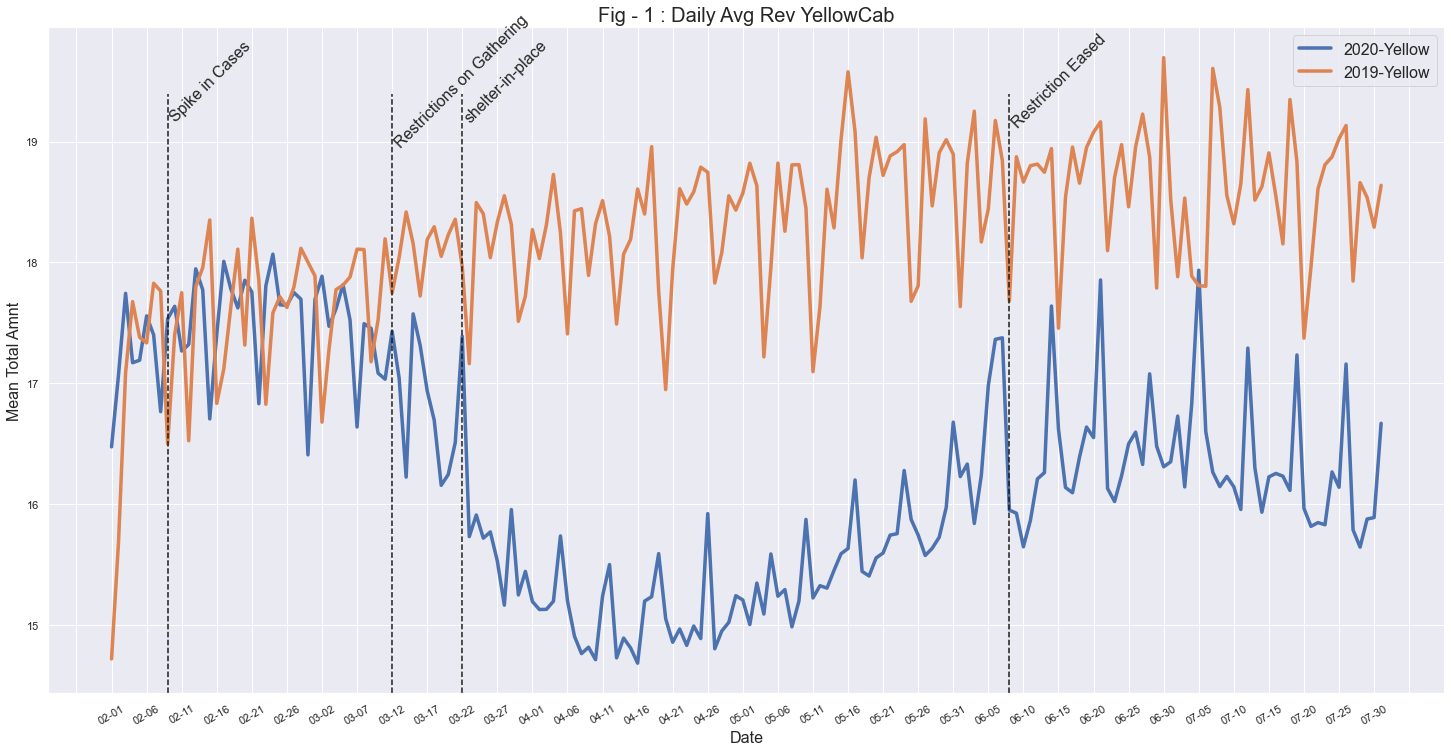

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

plt.plot(
    yellow_taxi_2020_df.MM_DD,
    (yellow_taxi_2020_df.average_revenue_1 + yellow_taxi_2020_df.average_revenue_2) / 2,
    linewidth=3.5,
)
plt.plot(
    yellow_taxi_2019_df.MM_DD,
    (yellow_taxi_2019_df.average_revenue_1 + yellow_taxi_2019_df.average_revenue_2) / 2,
    linewidth=3.5,
)

# plt.gcf().autofmt_xdate()
plt.xticks(rotation=30)
plt.tight_layout()

# plotting Covid-19 hightlights
xposition = [
    ["02-09", "Spike in Cases"],
    ["03-12", "Restrictions on Gathering"],
    ["03-22", "shelter-in-place"],
    ["06-08", "Restriction Eased"],
]

plt.legend(["2020-Yellow", "2019-Yellow"], prop={"size": 16})

plt.rcParams["font.size"] = "16"
ax.set_title("Fig - 1 : Daily Avg Rev YellowCab", fontsize=20)
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Mean Total Amnt", fontsize=16)

for xc in xposition:
    plt.axvline(x=xc[0], color="k", ymax=0.90, linestyle="--")
    plt.text(xc[0], 19.5, xc[1], rotation=45, verticalalignment="center")

plt.show()


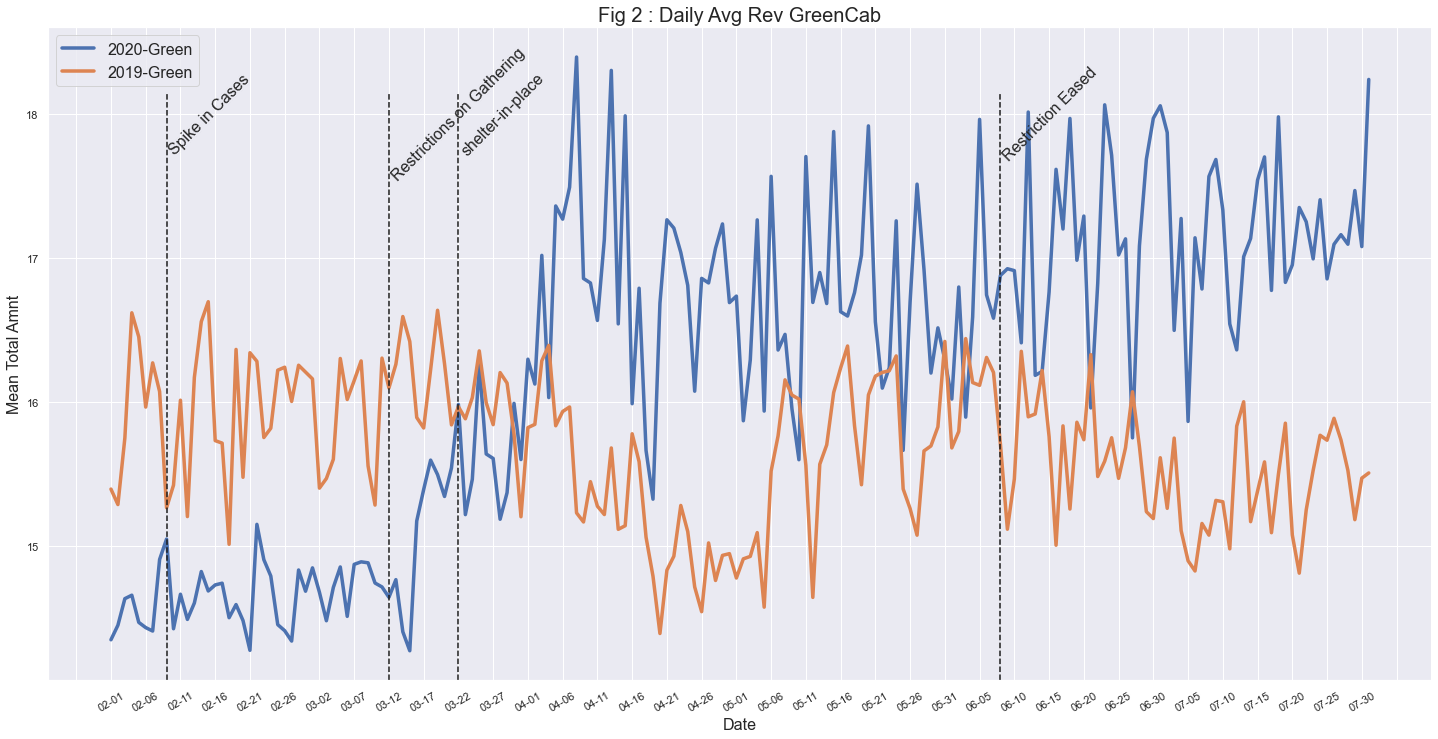

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

plt.plot(
    green_taxi_2020_df.MM_DD,
    (green_taxi_2020_df.average_revenue_1 + green_taxi_2020_df.average_revenue_2) / 2,
    linewidth=3.5,
)
plt.plot(
    green_taxi_2019_df.MM_DD,
    (green_taxi_2019_df.average_revenue_1 + green_taxi_2019_df.average_revenue_2) / 2,
    linewidth=3.5,
)

# plt.gcf().autofmt_xdate()
plt.xticks(rotation=30)
plt.tight_layout()

# plotting Covid-19 hightlights
xposition = [
    ["02-09", "Spike in Cases"],
    ["03-12", "Restrictions on Gathering"],
    ["03-22", "shelter-in-place"],
    ["06-08", "Restriction Eased"],
]

plt.legend(["2020-Green", "2019-Green"], prop={"size": 16})

plt.rcParams["font.size"] = "16"
ax.set_title("Fig 2 : Daily Avg Rev GreenCab", fontsize=20)
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Mean Total Amnt", fontsize=16)

for xc in xposition:
    plt.axvline(x=xc[0], color="k", ymax=0.90, linestyle="--")
    plt.text(xc[0], 18, xc[1], rotation=45, verticalalignment="center")

plt.show()


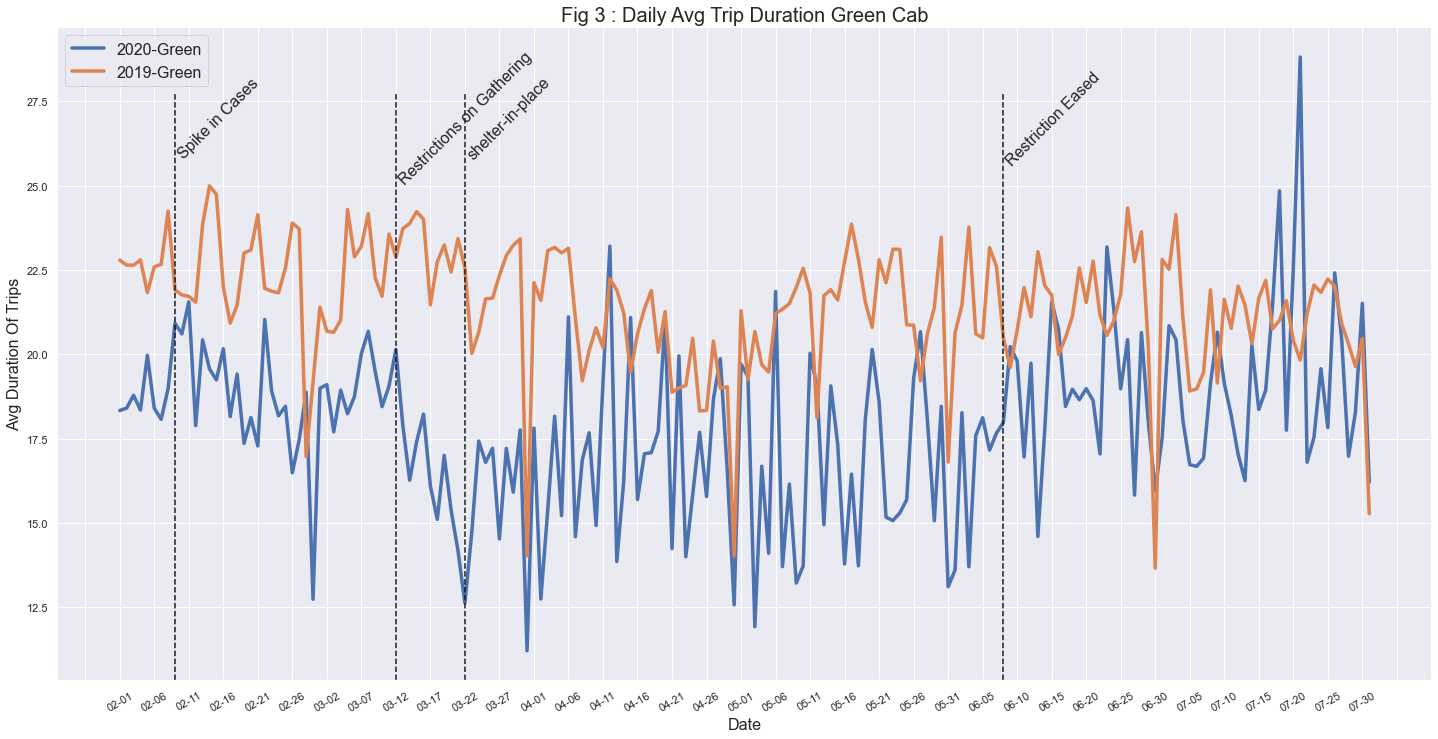

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

plt.plot(green_taxi_2020_df.MM_DD, green_taxi_2020_df.Trip_duration_min, linewidth=3.5)
plt.plot(green_taxi_2019_df.MM_DD, green_taxi_2019_df.Trip_duration_min, linewidth=3.5)

# plt.gcf().autofmt_xdate()
plt.xticks(rotation=30)
plt.tight_layout()

# plotting Covid-19 hightlights
xposition = [
    ["02-09", "Spike in Cases"],
    ["03-12", "Restrictions on Gathering"],
    ["03-22", "shelter-in-place"],
    ["06-08", "Restriction Eased"],
]

plt.legend(["2020-Green", "2019-Green"], prop={"size": 16})

plt.rcParams["font.size"] = "16"
ax.set_title("Fig 3 : Daily Avg Trip Duration Green Cab", fontsize=20)
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Avg Duration Of Trips", fontsize=16)

for xc in xposition:
    plt.axvline(x=xc[0], color="k", ymax=0.90, linestyle="--")
    plt.text(xc[0], 27, xc[1], rotation=45, verticalalignment="center")

plt.show()


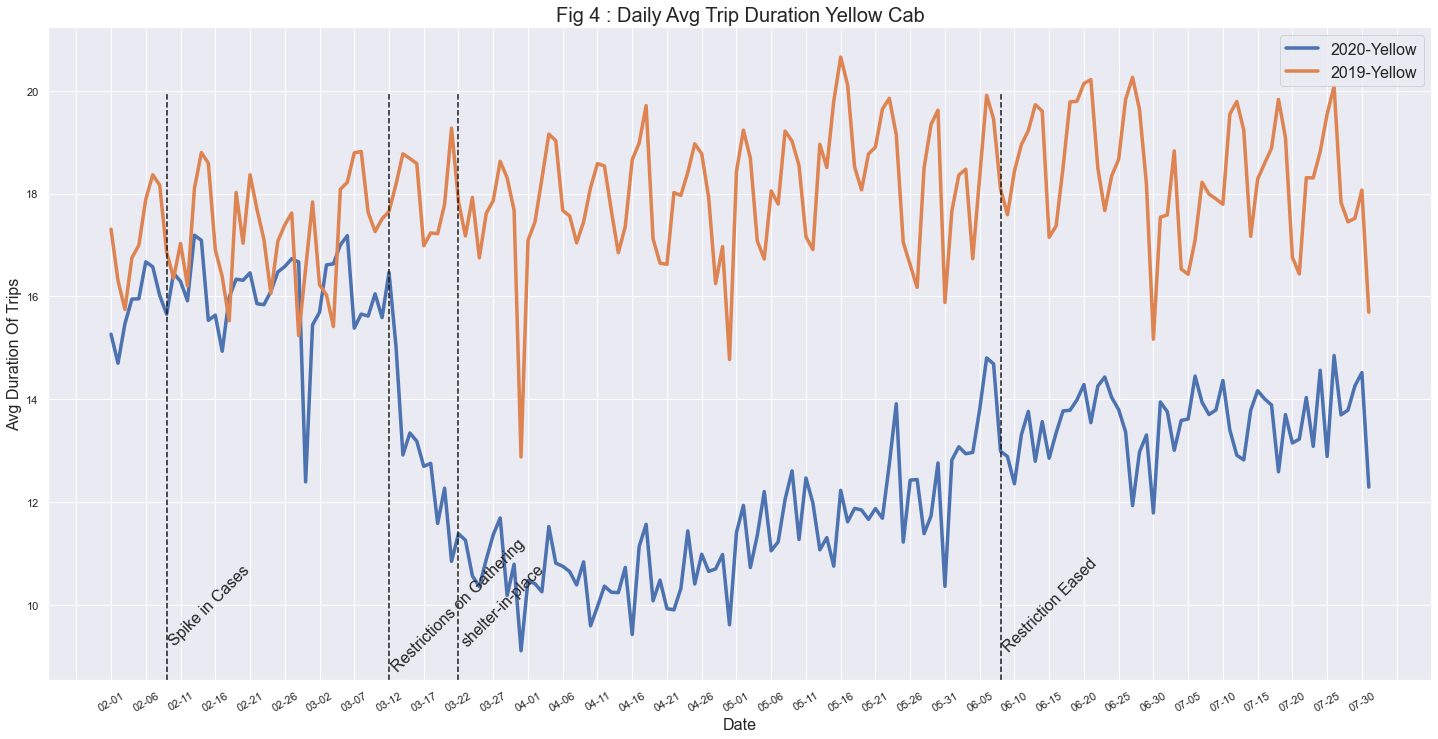

In [19]:
fig, ax = plt.subplots(figsize=(20,10))

#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

plt.plot(yellow_taxi_2020_df.MM_DD, yellow_taxi_2020_df.Trip_duration_min, linewidth=3.5)
plt.plot(yellow_taxi_2019_df.MM_DD, yellow_taxi_2019_df.Trip_duration_min, linewidth=3.5)


#plt.gcf().autofmt_xdate()
plt.xticks(rotation=30)
plt.tight_layout()

#plotting Covid-19 hightlights
xposition = [["02-09","Spike in Cases"], ["03-12", "Restrictions on Gathering"], ["03-22", "shelter-in-place"],
             ["06-08","Restriction Eased"]]

plt.legend(['2020-Yellow','2019-Yellow'], prop={"size":16})

plt.rcParams['font.size'] = '16'
ax.set_title('Fig 4 : Daily Avg Trip Duration Yellow Cab', fontsize=20)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Avg Duration Of Trips', fontsize=16)


for xc in xposition:
    
    plt.axvline(x=xc[0], color='k', ymax=0.90, linestyle='--')
    plt.text(xc[0], 10, xc[1], rotation=45, verticalalignment='center')
    

plt.show()

### Most & Least Expensive Trips

In [20]:
## Fetching Pickup and Dropoff Lookup Zones
taxi_zone_lookup = pd.read_csv(
    "https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv"
)
taxi_zone_lookup["combined_info"] = taxi_zone_lookup.apply(
    lambda row: "_".join(list(row.values.astype(str))), axis=1
)


In [21]:
## Creting a joint Pickup_Dropoff Location field for Max and Min Expensive trips
## 2020 data from yellow taxi
col_names = ["max_PULocationID", "max_DOLocationID"]
yellow_taxi_2020_df["max_PU_DO"] = yellow_taxi_2020_df[col_names].apply(
    lambda row: "_".join(list(row.values.astype(str))), axis=1
)
col_names = ["min_PULocationID", "min_DOLocationID"]
yellow_taxi_2020_df["min_PU_DO"] = yellow_taxi_2020_df[col_names].apply(
    lambda row: "_".join(list(row.values.astype(str))), axis=1
)

## 2019 data from yellow taxi
col_names = ["max_PULocationID", "max_DOLocationID"]
yellow_taxi_2019_df["max_PU_DO"] = yellow_taxi_2019_df[col_names].apply(
    lambda row: "_".join(list(row.values.astype(str))), axis=1
)
col_names = ["min_PULocationID", "min_DOLocationID"]
yellow_taxi_2019_df["min_PU_DO"] = yellow_taxi_2019_df[col_names].apply(
    lambda row: "_".join(list(row.values.astype(str))), axis=1
)

## 2020 data from green taxi
col_names = ["max_PULocationID", "max_DOLocationID"]
green_taxi_2020_df["max_PU_DO"] = green_taxi_2020_df[col_names].apply(
    lambda row: "_".join(list(row.values.astype(str))), axis=1
)
col_names = ["min_PULocationID", "min_DOLocationID"]
green_taxi_2020_df["min_PU_DO"] = green_taxi_2020_df[col_names].apply(
    lambda row: "_".join(list(row.values.astype(str))), axis=1
)

## 2019 data from green taxi
col_names = ["max_PULocationID", "max_DOLocationID"]
green_taxi_2019_df["max_PU_DO"] = green_taxi_2019_df[col_names].apply(
    lambda row: "_".join(list(row.values.astype(str))), axis=1
)
col_names = ["min_PULocationID", "min_DOLocationID"]
green_taxi_2019_df["min_PU_DO"] = green_taxi_2019_df[col_names].apply(
    lambda row: "_".join(list(row.values.astype(str))), axis=1
)


In [22]:
# Yellow-Cab
yellow_taxi_2020_df['Week_Num'] = yellow_taxi_2020_df['Date'].dt.strftime('%W')
yellow_taxi_2019_df['Week_Num'] = yellow_taxi_2019_df['Date'].dt.strftime('%W')

# Green-Cab
green_taxi_2020_df['Week_Num'] = green_taxi_2020_df['Date'].dt.strftime('%W')
green_taxi_2019_df['Week_Num'] = green_taxi_2019_df['Date'].dt.strftime('%W')

In [24]:
## Yellow Cab
yellow_taxi_2020_Max_Exp_df = (
    yellow_taxi_2020_df.groupby(["Week_Num"])
    .apply(
        lambda row: row[["max_PU_DO", "max_revenue"]].filter(
            items=[row.max_revenue.idxmax()], axis=0
        )
    )
    .reset_index()
    .drop("level_1", axis=1)
)

yellow_taxi_2020_Min_Exp_df = (
    yellow_taxi_2020_df.groupby(["Week_Num"])
    .apply(
        lambda row: row[["min_PU_DO", "min_revenue"]].filter(
            items=[row.max_revenue.idxmin()], axis=0
        )
    )
    .reset_index()
    .drop("level_1", axis=1)
)

yellow_taxi_2019_Max_Exp_df = (
    yellow_taxi_2019_df.groupby(["Week_Num"])
    .apply(
        lambda row: row[["max_PU_DO", "max_revenue"]].filter(
            items=[row.max_revenue.idxmax()], axis=0
        )
    )
    .reset_index()
    .drop("level_1", axis=1)
)

yellow_taxi_2019_Min_Exp_df = (
    yellow_taxi_2019_df.groupby(["Week_Num"])
    .apply(
        lambda row: row[["min_PU_DO", "min_revenue"]].filter(
            items=[row.max_revenue.idxmin()], axis=0
        )
    )
    .reset_index()
    .drop("level_1", axis=1)
)

## Green cab
green_taxi_2020_Max_Exp_df = (
    green_taxi_2020_df.groupby(["Week_Num"])
    .apply(
        lambda row: row[["max_PU_DO", "max_revenue"]].filter(
            items=[row.max_revenue.idxmax()], axis=0
        )
    )
    .reset_index()
    .drop("level_1", axis=1)
)

green_taxi_2020_Min_Exp_df = (
    green_taxi_2020_df.groupby(["Week_Num"])
    .apply(
        lambda row: row[["min_PU_DO", "min_revenue"]].filter(
            items=[row.max_revenue.idxmin()], axis=0
        )
    )
    .reset_index()
    .drop("level_1", axis=1)
)

green_taxi_2019_Max_Exp_df = (
    green_taxi_2019_df.groupby(["Week_Num"])
    .apply(
        lambda row: row[["max_PU_DO", "max_revenue"]].filter(
            items=[row.max_revenue.idxmax()], axis=0
        )
    )
    .reset_index()
    .drop("level_1", axis=1)
)

green_taxi_2019_Min_Exp_df = (
    green_taxi_2019_df.groupby(["Week_Num"])
    .apply(
        lambda row: row[["min_PU_DO", "min_revenue"]].filter(
            items=[row.max_revenue.idxmin()], axis=0
        )
    )
    .reset_index()
    .drop("level_1", axis=1)
)


In [25]:
# Yellow-Cab
yellow_taxi_2020_Ext_df = yellow_taxi_2020_Max_Exp_df.merge(
    yellow_taxi_2020_Min_Exp_df, on="Week_Num"
)
yellow_taxi_2019_Ext_df = yellow_taxi_2019_Max_Exp_df.merge(
    yellow_taxi_2019_Min_Exp_df, on="Week_Num"
)

# Green-Cab
green_taxi_2020_Ext_df = green_taxi_2020_Max_Exp_df.merge(
    green_taxi_2020_Min_Exp_df, on="Week_Num"
)
green_taxi_2019_Ext_df = green_taxi_2019_Max_Exp_df.merge(
    green_taxi_2019_Min_Exp_df, on="Week_Num"
)


In [26]:
# Yellow-cab
yellow_taxi_2020_Ext_df["Max_PU"] = yellow_taxi_2020_Ext_df["max_PU_DO"].str.split(
    "_", n=1, expand=True
)[0]
yellow_taxi_2020_Ext_df["Max_DO"] = yellow_taxi_2020_Ext_df["max_PU_DO"].str.split(
    "_", n=1, expand=True
)[1]
yellow_taxi_2020_Ext_df.drop("max_PU_DO", axis=1, inplace=True)

yellow_taxi_2019_Ext_df["Max_PU"] = yellow_taxi_2019_Ext_df["max_PU_DO"].str.split(
    "_", n=1, expand=True
)[0]
yellow_taxi_2019_Ext_df["Max_DO"] = yellow_taxi_2019_Ext_df["max_PU_DO"].str.split(
    "_", n=1, expand=True
)[1]
yellow_taxi_2019_Ext_df.drop("max_PU_DO", axis=1, inplace=True)

# Green-cab
green_taxi_2020_Ext_df["Max_PU"] = green_taxi_2020_Ext_df["max_PU_DO"].str.split(
    "_", n=1, expand=True
)[0]
green_taxi_2020_Ext_df["Max_DO"] = green_taxi_2020_Ext_df["max_PU_DO"].str.split(
    "_", n=1, expand=True
)[1]
green_taxi_2020_Ext_df.drop("max_PU_DO", axis=1, inplace=True)

green_taxi_2019_Ext_df["Max_PU"] = green_taxi_2019_Ext_df["max_PU_DO"].str.split(
    "_", n=1, expand=True
)[0]
green_taxi_2019_Ext_df["Max_DO"] = green_taxi_2019_Ext_df["max_PU_DO"].str.split(
    "_", n=1, expand=True
)[1]
green_taxi_2019_Ext_df.drop("max_PU_DO", axis=1, inplace=True)


In [27]:
# Yellow-cab
yellow_taxi_2020_Ext_df["Min_PU"] = yellow_taxi_2020_Ext_df["min_PU_DO"].str.split(
    "_", n=1, expand=True
)[0]
yellow_taxi_2020_Ext_df["Min_DO"] = yellow_taxi_2020_Ext_df["min_PU_DO"].str.split(
    "_", n=1, expand=True
)[1]
yellow_taxi_2020_Ext_df.drop("min_PU_DO", axis=1, inplace=True)

yellow_taxi_2019_Ext_df["Min_PU"] = yellow_taxi_2019_Ext_df["min_PU_DO"].str.split(
    "_", n=1, expand=True
)[0]
yellow_taxi_2019_Ext_df["Min_DO"] = yellow_taxi_2019_Ext_df["min_PU_DO"].str.split(
    "_", n=1, expand=True
)[1]
yellow_taxi_2019_Ext_df.drop("min_PU_DO", axis=1, inplace=True)

# Green-cab
green_taxi_2020_Ext_df["Min_PU"] = green_taxi_2020_Ext_df["min_PU_DO"].str.split(
    "_", n=1, expand=True
)[0]
green_taxi_2020_Ext_df["Min_DO"] = green_taxi_2020_Ext_df["min_PU_DO"].str.split(
    "_", n=1, expand=True
)[1]
green_taxi_2020_Ext_df.drop("min_PU_DO", axis=1, inplace=True)

green_taxi_2019_Ext_df["Min_PU"] = green_taxi_2019_Ext_df["min_PU_DO"].str.split(
    "_", n=1, expand=True
)[0]
green_taxi_2019_Ext_df["Min_DO"] = green_taxi_2019_Ext_df["min_PU_DO"].str.split(
    "_", n=1, expand=True
)[1]
green_taxi_2019_Ext_df.drop("min_PU_DO", axis=1, inplace=True)


In [28]:
# Yellow-cab
yellow_taxi_2020_Ext_df["Max_PU"] = (
    yellow_taxi_2020_Ext_df["Max_PU"]
    .astype(int)
    .map(taxi_zone_lookup.set_index("LocationID")["combined_info"])
)
yellow_taxi_2020_Ext_df["Max_DO"] = (
    yellow_taxi_2020_Ext_df["Max_DO"]
    .astype(int)
    .map(taxi_zone_lookup.set_index("LocationID")["combined_info"])
)
yellow_taxi_2020_Ext_df["Min_PU"] = (
    yellow_taxi_2020_Ext_df["Min_PU"]
    .astype(int)
    .map(taxi_zone_lookup.set_index("LocationID")["combined_info"])
)
yellow_taxi_2020_Ext_df["Min_DO"] = (
    yellow_taxi_2020_Ext_df["Min_DO"]
    .astype(int)
    .map(taxi_zone_lookup.set_index("LocationID")["combined_info"])
)

yellow_taxi_2019_Ext_df["Max_PU"] = (
    yellow_taxi_2019_Ext_df["Max_PU"]
    .astype(int)
    .map(taxi_zone_lookup.set_index("LocationID")["combined_info"])
)
yellow_taxi_2019_Ext_df["Max_DO"] = (
    yellow_taxi_2019_Ext_df["Max_DO"]
    .astype(int)
    .map(taxi_zone_lookup.set_index("LocationID")["combined_info"])
)
yellow_taxi_2019_Ext_df["Min_PU"] = (
    yellow_taxi_2019_Ext_df["Min_PU"]
    .astype(int)
    .map(taxi_zone_lookup.set_index("LocationID")["combined_info"])
)
yellow_taxi_2019_Ext_df["Min_DO"] = (
    yellow_taxi_2019_Ext_df["Min_DO"]
    .astype(int)
    .map(taxi_zone_lookup.set_index("LocationID")["combined_info"])
)

# Green-cab
green_taxi_2020_Ext_df["Max_PU"] = (
    green_taxi_2020_Ext_df["Max_PU"]
    .astype(int)
    .map(taxi_zone_lookup.set_index("LocationID")["combined_info"])
)
green_taxi_2020_Ext_df["Max_DO"] = (
    green_taxi_2020_Ext_df["Max_DO"]
    .astype(int)
    .map(taxi_zone_lookup.set_index("LocationID")["combined_info"])
)
green_taxi_2020_Ext_df["Min_PU"] = (
    green_taxi_2020_Ext_df["Min_PU"]
    .astype(int)
    .map(taxi_zone_lookup.set_index("LocationID")["combined_info"])
)
green_taxi_2020_Ext_df["Min_DO"] = (
    green_taxi_2020_Ext_df["Min_DO"]
    .astype(int)
    .map(taxi_zone_lookup.set_index("LocationID")["combined_info"])
)

green_taxi_2019_Ext_df["Max_PU"] = (
    green_taxi_2019_Ext_df["Max_PU"]
    .astype(int)
    .map(taxi_zone_lookup.set_index("LocationID")["combined_info"])
)
green_taxi_2019_Ext_df["Max_DO"] = (
    green_taxi_2019_Ext_df["Max_DO"]
    .astype(int)
    .map(taxi_zone_lookup.set_index("LocationID")["combined_info"])
)
green_taxi_2019_Ext_df["Min_PU"] = (
    green_taxi_2019_Ext_df["Min_PU"]
    .astype(int)
    .map(taxi_zone_lookup.set_index("LocationID")["combined_info"])
)
green_taxi_2019_Ext_df["Min_DO"] = (
    green_taxi_2019_Ext_df["Min_DO"]
    .astype(int)
    .map(taxi_zone_lookup.set_index("LocationID")["combined_info"])
)


In [29]:
yellow_taxi_2020_Ext_df

,Week_Num,max_revenue,min_revenue,Max_PU,Max_DO,Min_PU,Min_DO
0,04,495.95,0.30,132_Queens_JFK Airport_Airports,265_Unknown_nan_nan,265_Unknown_nan_nan,265_Unknown_nan_nan
1,05,960.80,0.30,48_Manhattan_Clinton East_Yellow Zone,265_Unknown_nan_nan,113_Manhattan_Greenwich Village North_Yellow Zone,68_Manhattan_East Chelsea_Yellow Zone
2,06,897.06,0.30,48_Manhattan_Clinton East_Yellow Zone,100_Manhattan_Garment District_Yellow Zone,162_Manhattan_Midtown East_Yellow Zone,162_Manhattan_Midtown East_Yellow Zone
3,07,967.05,0.30,56_Queens_Corona_Boro Zone,230_Manhattan_Times Sq/Theatre District_Yellow...,88_Manhattan_Financial District South_Yellow Zone,88_Manhattan_Financial District South_Yellow Zone
4,08,800.30,0.30,140_Manhattan_Lenox Hill East_Yellow Zone,265_Unknown_nan_nan,48_Manhattan_Clinton East_Yellow Zone,48_Manhattan_Clinton East_Yellow Zone
5,09,821.30,0.30,4_Manhattan_Alphabet City_Yellow Zone,142_Manhattan_Lincoln Square East_Yellow Zone,90_Manhattan_Flatiron_Yellow Zone,18_Bronx_Bedford Park_Boro Zone
6,10,633.30,0.30,22_Brooklyn_Bensonhurst West_Boro Zone,193_Queens_Queensbridge/Ravenswood_Boro Zone,141_Manhattan_Lenox Hill West_Yellow Zone,140_Manhattan_Lenox Hill East_Yellow Zone
7,11,1260.30,0.30,10_Queens_Baisley Park_Boro Zone,10_Queens_Baisley Park_Boro Zone,238_Manhattan_Upper West Side North_Yellow Zone,238_Manhattan_Upper West Side North_Yellow Zone
8,12,405.17,0.30,132_Queens_JFK Airport_Airports,265_Unknown_nan_nan,263_Manhattan_Yorkville West_Yellow Zone,263_Manhattan_Yorkville West_Yellow Zone
9,13,666.91,3.30,231_Manhattan_TriBeCa/Civic Center_Yellow Zone,265_Unknown_nan_nan,136_Bronx_Kingsbridge Heights_Boro Zone,136_Bronx_Kingsbridge Heights_Boro Zone


In [30]:
yellow_taxi_2019_Ext_df

,Week_Num,max_revenue,min_revenue,Max_PU,Max_DO,Min_PU,Min_DO
0,04,545.80,0.3,114_Manhattan_Greenwich Village South_Yellow Zone,11_Brooklyn_Bath Beach_Boro Zone,143_Manhattan_Lincoln Square West_Yellow Zone,143_Manhattan_Lincoln Square West_Yellow Zone
1,05,469.69,0.3,164_Manhattan_Midtown South_Yellow Zone,265_Unknown_nan_nan,265_Unknown_nan_nan,265_Unknown_nan_nan
2,06,545.89,0.3,7_Queens_Astoria_Boro Zone,7_Queens_Astoria_Boro Zone,74_Manhattan_East Harlem North_Boro Zone,74_Manhattan_East Harlem North_Boro Zone
3,07,750.30,0.3,246_Manhattan_West Chelsea/Hudson Yards_Yellow...,265_Unknown_nan_nan,132_Queens_JFK Airport_Airports,132_Queens_JFK Airport_Airports
4,08,792.30,0.3,164_Manhattan_Midtown South_Yellow Zone,138_Queens_LaGuardia Airport_Airports,265_Unknown_nan_nan,265_Unknown_nan_nan
5,09,1150.06,0.3,132_Queens_JFK Airport_Airports,265_Unknown_nan_nan,230_Manhattan_Times Sq/Theatre District_Yellow...,1_EWR_Newark Airport_EWR
6,10,613.80,0.3,226_Queens_Sunnyside_Boro Zone,226_Queens_Sunnyside_Boro Zone,132_Queens_JFK Airport_Airports,132_Queens_JFK Airport_Airports
7,11,564.06,0.3,193_Queens_Queensbridge/Ravenswood_Boro Zone,193_Queens_Queensbridge/Ravenswood_Boro Zone,10_Queens_Baisley Park_Boro Zone,230_Manhattan_Times Sq/Theatre District_Yellow...
8,12,516.63,0.3,114_Manhattan_Greenwich Village South_Yellow Zone,265_Unknown_nan_nan,265_Unknown_nan_nan,265_Unknown_nan_nan
9,13,922.54,0.3,229_Manhattan_Sutton Place/Turtle Bay North_Ye...,233_Manhattan_UN/Turtle Bay South_Yellow Zone,265_Unknown_nan_nan,1_EWR_Newark Airport_EWR


In [31]:
green_taxi_2019_Ext_df

,Week_Num,max_revenue,min_revenue,Max_PU,Max_DO,Min_PU,Min_DO
0,04,200.00,0.01,26_Brooklyn_Borough Park_Boro Zone,26_Brooklyn_Borough Park_Boro Zone,265_Unknown_nan_nan,265_Unknown_nan_nan
1,05,283.55,3.30,166_Manhattan_Morningside Heights_Boro Zone,265_Unknown_nan_nan,168_Bronx_Mott Haven/Port Morris_Boro Zone,168_Bronx_Mott Haven/Port Morris_Boro Zone
2,06,4012.30,0.01,95_Queens_Forest Hills_Boro Zone,121_Queens_Hillcrest/Pomonok_Boro Zone,95_Queens_Forest Hills_Boro Zone,95_Queens_Forest Hills_Boro Zone
3,07,2156.30,3.30,264_Unknown_NV_nan,193_Queens_Queensbridge/Ravenswood_Boro Zone,93_Queens_Flushing Meadows-Corona Park_Boro Zone,93_Queens_Flushing Meadows-Corona Park_Boro Zone
4,08,1529.80,2.75,193_Queens_Queensbridge/Ravenswood_Boro Zone,193_Queens_Queensbridge/Ravenswood_Boro Zone,196_Queens_Rego Park_Boro Zone,260_Queens_Woodside_Boro Zone
5,09,388.80,0.25,74_Manhattan_East Harlem North_Boro Zone,212_Bronx_Soundview/Bruckner_Boro Zone,159_Bronx_Melrose South_Boro Zone,159_Bronx_Melrose South_Boro Zone
6,10,377.30,3.30,42_Manhattan_Central Harlem North_Boro Zone,42_Manhattan_Central Harlem North_Boro Zone,198_Queens_Ridgewood_Boro Zone,198_Queens_Ridgewood_Boro Zone
7,11,541.30,0.01,193_Queens_Queensbridge/Ravenswood_Boro Zone,193_Queens_Queensbridge/Ravenswood_Boro Zone,51_Bronx_Co-Op City_Boro Zone,264_Unknown_NV_nan
8,12,341.26,3.30,226_Queens_Sunnyside_Boro Zone,265_Unknown_nan_nan,157_Queens_Maspeth_Boro Zone,157_Queens_Maspeth_Boro Zone
9,13,1432.50,0.10,197_Queens_Richmond Hill_Boro Zone,7_Queens_Astoria_Boro Zone,78_Bronx_East Tremont_Boro Zone,248_Bronx_West Farms/Bronx River_Boro Zone


In [32]:
green_taxi_2020_Ext_df

,Week_Num,max_revenue,min_revenue,Max_PU,Max_DO,Min_PU,Min_DO
0,04,458.80,3.30,55_Brooklyn_Coney Island_Boro Zone,11_Brooklyn_Bath Beach_Boro Zone,33_Brooklyn_Brooklyn Heights_Boro Zone,33_Brooklyn_Brooklyn Heights_Boro Zone
1,05,651.50,3.00,25_Brooklyn_Boerum Hill_Boro Zone,97_Brooklyn_Fort Greene_Boro Zone,116_Manhattan_Hamilton Heights_Boro Zone,116_Manhattan_Hamilton Heights_Boro Zone
2,06,415.30,0.31,78_Bronx_East Tremont_Boro Zone,254_Bronx_Williamsbridge/Olinville_Boro Zone,244_Manhattan_Washington Heights South_Boro Zone,42_Manhattan_Central Harlem North_Boro Zone
3,07,430.80,0.80,130_Queens_Jamaica_Boro Zone,265_Unknown_nan_nan,57_Queens_Corona_Boro Zone,70_Queens_East Elmhurst_Boro Zone
4,08,222.56,2.80,65_Brooklyn_Downtown Brooklyn/MetroTech_Boro Zone,265_Unknown_nan_nan,174_Bronx_Norwood_Boro Zone,211_Manhattan_SoHo_Yellow Zone
5,09,290.00,2.80,55_Brooklyn_Coney Island_Boro Zone,55_Brooklyn_Coney Island_Boro Zone,32_Bronx_Bronxdale_Boro Zone,50_Manhattan_Clinton West_Yellow Zone
6,10,462.27,3.30,61_Brooklyn_Crown Heights North_Boro Zone,17_Brooklyn_Bedford_Boro Zone,116_Manhattan_Hamilton Heights_Boro Zone,116_Manhattan_Hamilton Heights_Boro Zone
7,11,239.30,3.30,223_Queens_Steinway_Boro Zone,223_Queens_Steinway_Boro Zone,130_Queens_Jamaica_Boro Zone,130_Queens_Jamaica_Boro Zone
8,12,185.17,3.30,95_Queens_Forest Hills_Boro Zone,265_Unknown_nan_nan,78_Bronx_East Tremont_Boro Zone,78_Bronx_East Tremont_Boro Zone
9,13,394.12,3.30,215_Queens_South Jamaica_Boro Zone,215_Queens_South Jamaica_Boro Zone,41_Manhattan_Central Harlem_Boro Zone,41_Manhattan_Central Harlem_Boro Zone


### Most polular payment method

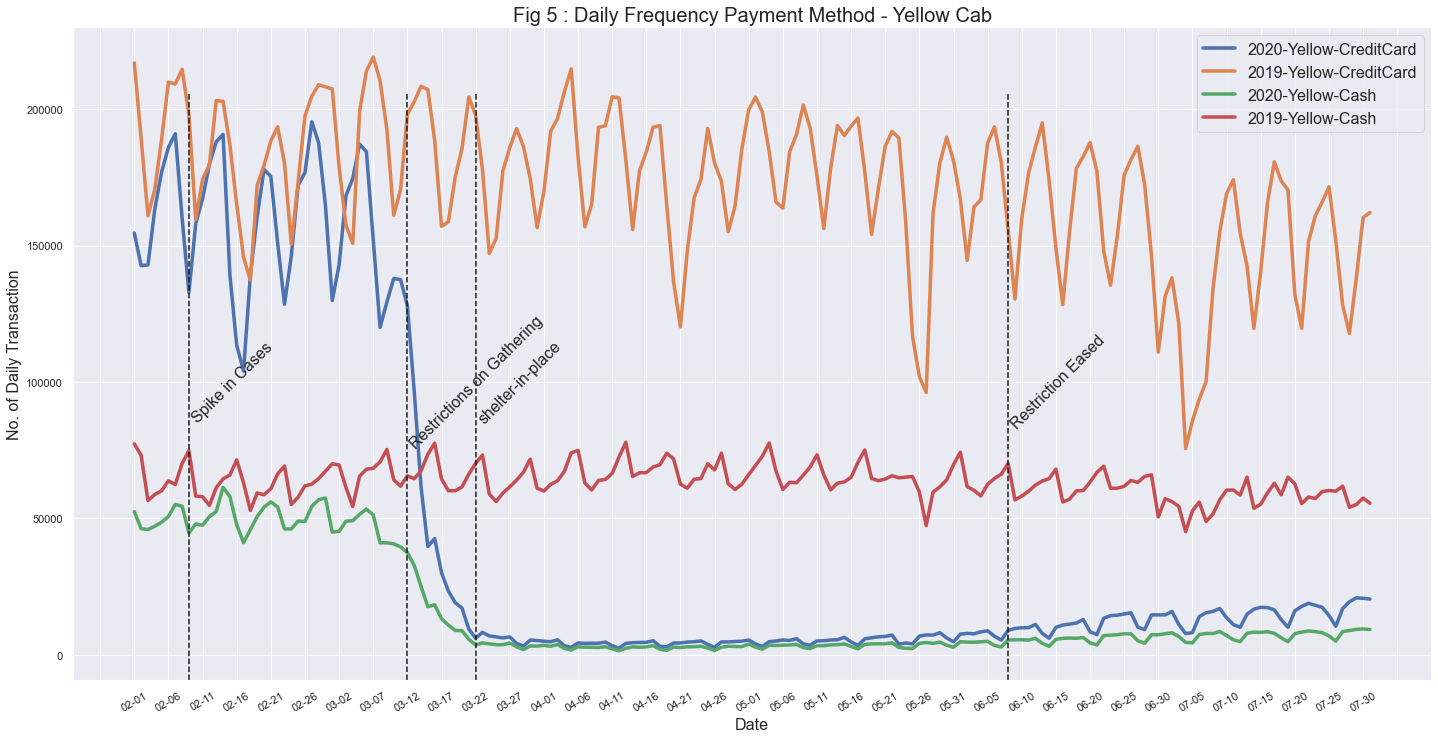

In [33]:
fig, ax = plt.subplots(figsize=(20, 10))

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

plt.plot(
    yellow_taxi_2020_df.MM_DD, yellow_taxi_2020_df.payment_type_1_count, linewidth=3.5
)
plt.plot(
    yellow_taxi_2019_df.MM_DD, yellow_taxi_2019_df.payment_type_1_count, linewidth=3.5
)

plt.plot(
    yellow_taxi_2020_df.MM_DD, yellow_taxi_2020_df.payment_type_2_count, linewidth=3.5
)
plt.plot(
    yellow_taxi_2019_df.MM_DD, yellow_taxi_2019_df.payment_type_2_count, linewidth=3.5
)

# plt.gcf().autofmt_xdate()
plt.xticks(rotation=30)
plt.tight_layout()

# plotting Covid-19 hightlights
xposition = [
    ["02-09", "Spike in Cases"],
    ["03-12", "Restrictions on Gathering"],
    ["03-22", "shelter-in-place"],
    ["06-08", "Restriction Eased"],
]

plt.legend(
    [
        "2020-Yellow-CreditCard",
        "2019-Yellow-CreditCard",
        "2020-Yellow-Cash",
        "2019-Yellow-Cash",
    ],
    prop={"size": 16},
)
# plt.legend(['2020-Yellow-CreditCard','2020-Yellow-Cash'], prop={"size":16})


plt.rcParams["font.size"] = "16"
ax.set_title("Fig 5 : Daily Frequency Payment Method - Yellow Cab", fontsize=20)
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("No. of Daily Transaction", fontsize=16)

for xc in xposition:
    plt.axvline(x=xc[0], color="k", ymax=0.90, linestyle="--")
    plt.text(xc[0], 100000, xc[1], rotation=45, verticalalignment="center")

plt.show()


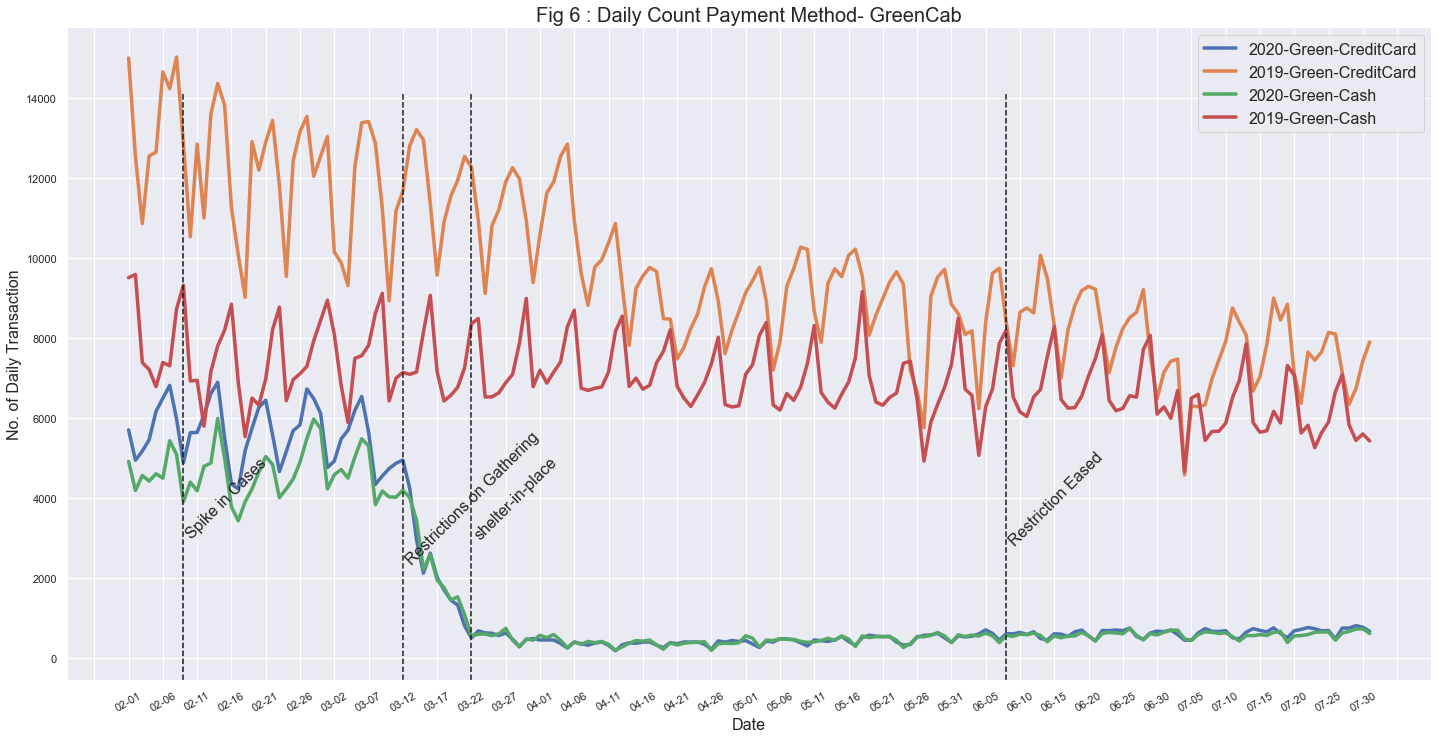

In [34]:
fig, ax = plt.subplots(figsize=(20, 10))

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

plt.plot(
    green_taxi_2020_df.MM_DD, green_taxi_2020_df.payment_type_1_count, linewidth=3.5
)
plt.plot(
    green_taxi_2019_df.MM_DD, green_taxi_2019_df.payment_type_1_count, linewidth=3.5
)

plt.plot(
    green_taxi_2020_df.MM_DD, green_taxi_2020_df.payment_type_2_count, linewidth=3.5
)
plt.plot(
    green_taxi_2019_df.MM_DD, green_taxi_2019_df.payment_type_2_count, linewidth=3.5
)

# plt.gcf().autofmt_xdate()
plt.xticks(rotation=30)
plt.tight_layout()

# plotting Covid-19 hightlights
xposition = [
    ["02-09", "Spike in Cases"],
    ["03-12", "Restrictions on Gathering"],
    ["03-22", "shelter-in-place"],
    ["06-08", "Restriction Eased"],
]

plt.legend(
    [
        "2020-Green-CreditCard",
        "2019-Green-CreditCard",
        "2020-Green-Cash",
        "2019-Green-Cash",
    ],
    prop={"size": 16},
)
# plt.legend(['2020-Yellow-CreditCard','2020-Yellow-Cash'], prop={"size":16})


plt.rcParams["font.size"] = "16"
ax.set_title("Fig 6 : Daily Count Payment Method- GreenCab", fontsize=20)
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("No. of Daily Transaction", fontsize=16)

for xc in xposition:
    plt.axvline(x=xc[0], color="k", ymax=0.90, linestyle="--")
    plt.text(xc[0], 4000, xc[1], rotation=45, verticalalignment="center")

plt.show()


### Most Expensive Day of the week

In [35]:
yellow_taxi_2020_df["Day_of_Week"] = yellow_taxi_2020_df["Date"].dt.strftime("%A")
yellow_taxi_2020_df["Com_Avg_Rev"] = (
    yellow_taxi_2020_df.average_revenue_1 + yellow_taxi_2020_df.average_revenue_2
) / 2
yellow_taxi_2020_day_rev_df = (
    yellow_taxi_2020_df.groupby(["Day_of_Week"])["Com_Avg_Rev"].mean().reset_index()
)

green_taxi_2020_df["Day_of_Week"] = green_taxi_2020_df["Date"].dt.strftime("%A")
green_taxi_2020_df["Com_Avg_Rev"] = (
    green_taxi_2020_df.average_revenue_1 + green_taxi_2020_df.average_revenue_2
) / 2
green_taxi_2020_day_rev_df = (
    green_taxi_2020_df.groupby(["Day_of_Week"])["Com_Avg_Rev"].mean().reset_index()
)


In [36]:
yellow_taxi_2019_df["Day_of_Week"] = yellow_taxi_2019_df["Date"].dt.strftime("%A")
yellow_taxi_2019_df["Com_Avg_Rev"] = (
    yellow_taxi_2019_df.average_revenue_1 + yellow_taxi_2019_df.average_revenue_2
) / 2
yellow_taxi_2019_day_rev_df = (
    yellow_taxi_2019_df.groupby(["Day_of_Week"])["Com_Avg_Rev"].mean().reset_index()
)

green_taxi_2019_df["Day_of_Week"] = green_taxi_2019_df["Date"].dt.strftime("%A")
green_taxi_2019_df["Com_Avg_Rev"] = (
    green_taxi_2019_df.average_revenue_1 + green_taxi_2019_df.average_revenue_2
) / 2
green_taxi_2019_day_rev_df = (
    green_taxi_2019_df.groupby(["Day_of_Week"])["Com_Avg_Rev"].mean().reset_index()
)


In [37]:
# Normalizing the Daily Average Revenue
yellow_taxi_2020_day_rev_df["Com_Avg_Rev_Nor"] = (
    yellow_taxi_2020_day_rev_df["Com_Avg_Rev"]
    - yellow_taxi_2020_day_rev_df["Com_Avg_Rev"].min()
) / (
    yellow_taxi_2020_day_rev_df["Com_Avg_Rev"].max()
    - yellow_taxi_2020_day_rev_df["Com_Avg_Rev"].min()
)
yellow_taxi_2019_day_rev_df["Com_Avg_Rev_Nor"] = (
    yellow_taxi_2019_day_rev_df["Com_Avg_Rev"]
    - yellow_taxi_2019_day_rev_df["Com_Avg_Rev"].min()
) / (
    yellow_taxi_2019_day_rev_df["Com_Avg_Rev"].max()
    - yellow_taxi_2019_day_rev_df["Com_Avg_Rev"].min()
)

# Normalizing the Daily Average Revenue
green_taxi_2020_day_rev_df["Com_Avg_Rev_Nor"] = (
    green_taxi_2020_day_rev_df["Com_Avg_Rev"]
    - green_taxi_2020_day_rev_df["Com_Avg_Rev"].min()
) / (
    green_taxi_2020_day_rev_df["Com_Avg_Rev"].max()
    - green_taxi_2020_day_rev_df["Com_Avg_Rev"].min()
)
green_taxi_2019_day_rev_df["Com_Avg_Rev_Nor"] = (
    green_taxi_2019_day_rev_df["Com_Avg_Rev"]
    - green_taxi_2019_day_rev_df["Com_Avg_Rev"].min()
) / (
    green_taxi_2019_day_rev_df["Com_Avg_Rev"].max()
    - green_taxi_2019_day_rev_df["Com_Avg_Rev"].min()
)


In [38]:
yellow_taxi_2020_day_rev_df.drop("Com_Avg_Rev", axis=1, inplace=True)
yellow_taxi_2019_day_rev_df.drop("Com_Avg_Rev", axis=1, inplace=True)

green_taxi_2020_day_rev_df.drop("Com_Avg_Rev", axis=1, inplace=True)
green_taxi_2019_day_rev_df.drop("Com_Avg_Rev", axis=1, inplace=True)

In [39]:
df_yellow = pd.concat(
    {
        "2020": yellow_taxi_2020_day_rev_df.set_index("Day_of_Week").Com_Avg_Rev_Nor,
        "2019": yellow_taxi_2019_day_rev_df.set_index("Day_of_Week").Com_Avg_Rev_Nor,
    },
    axis=1,
)

df_green = pd.concat(
    {
        "2020": green_taxi_2020_day_rev_df.set_index("Day_of_Week").Com_Avg_Rev_Nor,
        "2019": green_taxi_2019_day_rev_df.set_index("Day_of_Week").Com_Avg_Rev_Nor,
    },
    axis=1,
)


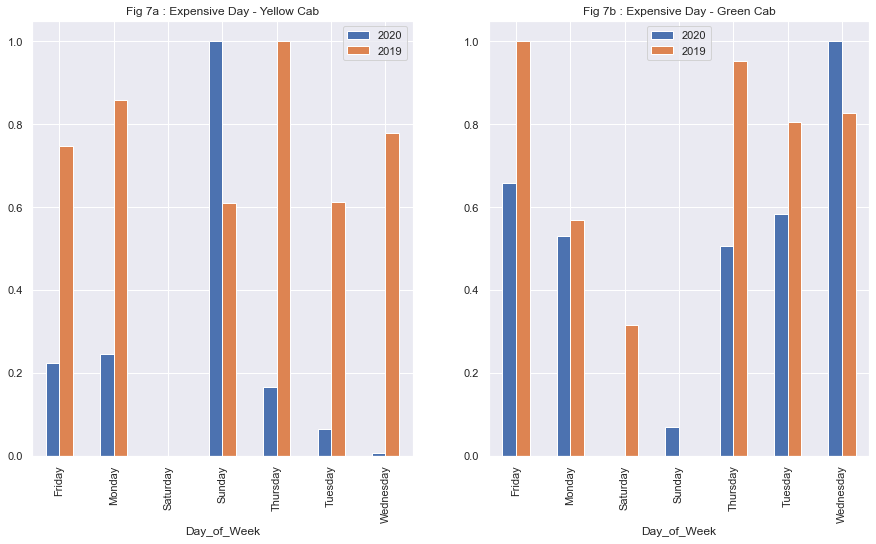

In [40]:
fig, axes = plt.subplots(figsize=(15,8),nrows=1, ncols=2)

df_yellow.plot(ax=axes[0], kind='bar', grid=True)
df_green.plot(ax=axes[1], kind='bar', grid=True)

axes[0].set_title("Fig 7a : Expensive Day - Yellow Cab")
axes[1].set_title("Fig 7b : Expensive Day - Green Cab")

plt.show()